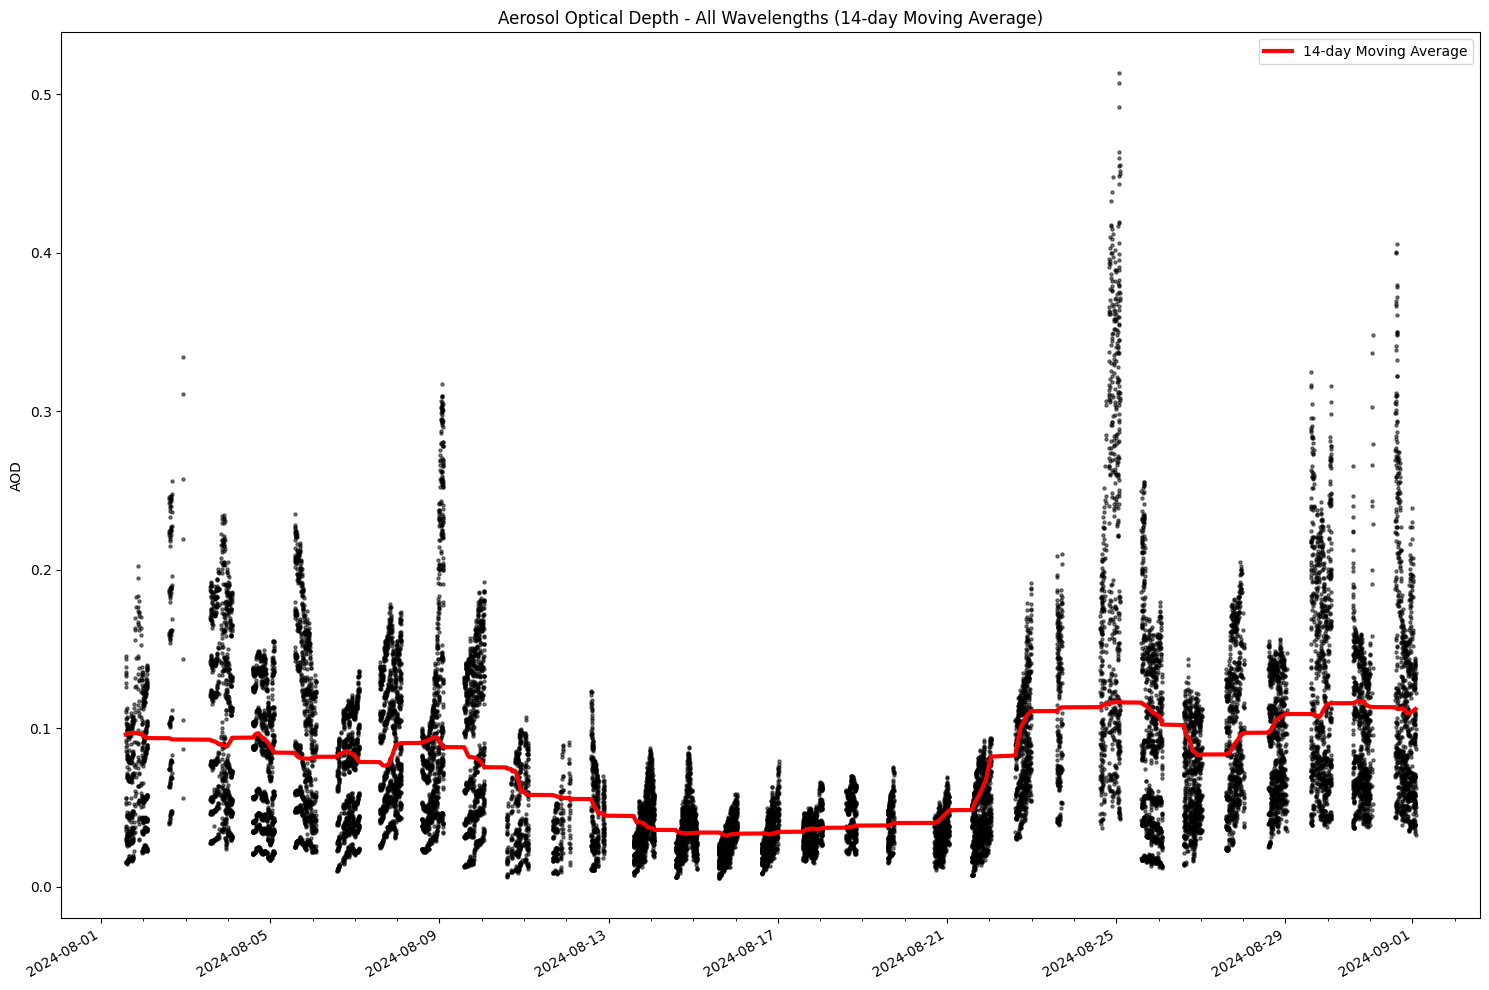

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Function to read AERONET data from a CSV file
def read_aeronet(filename):
    df = pd.read_csv(filename, skiprows=6, na_values=['-999.000000', '-999.'])
    df['datetime'] = pd.to_datetime(df['Date(dd:mm:yyyy)'] + ' ' + df['Time(hh:mm:ss)'],
                                    format='%d:%m:%Y %H:%M:%S')
    return df

# Function to calculate moving average with a centered window
def calculate_moving_average(series, window):
    r = window // 2
    n = len(series)
    result = np.full(n, np.nan)
    for k in range(n):
        start = max(0, k - r)
        end = min(n, k + r + 1)
        window_data = series.iloc[start:end]
        if not window_data.isna().all():
            result[k] = np.nanmean(window_data)
    return result

# Path to the AERONET data file
filename = 'Tdata24.lev15'

# Read and process the data
df = read_aeronet(filename)
df = df.sort_values('datetime')

# Identify all AOD columns
aod_columns = [col for col in df.columns if col.startswith('AOD_') and col.endswith('nm')]

# Calculate the average AOD across all wavelengths
df['AOD_avg'] = df[aod_columns].mean(axis=1)

# Calculate 14-day moving average for the average AOD (14 days * 24 hours + 1 to center)
window_size = 14 * 24 + 1
df['AOD_MA'] = calculate_moving_average(df['AOD_avg'], window_size)

# Plot the data with individual AOD measurements and the 14-day moving average
plt.figure(figsize=(15, 10))

# Plot individual AOD measurements without adding them to the legend
for col in aod_columns:
    plt.scatter(df['datetime'], df[col], color='black', s=5, alpha=0.5)

# Plot 14-day moving average and include only this in the legend
plt.plot(df['datetime'], df['AOD_MA'], color='red', linewidth=3, label='14-day Moving Average')

plt.ylabel('AOD')
plt.title('Aerosol Optical Depth - All Wavelengths (14-day Moving Average)')
plt.legend()

# Format x-axis
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

